# This notebook perform some additional cleaning of AWOS/SNOTEL Surface Data, as well as import ASOS data.

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime
import seaborn as sns
import sys
#pd.show_versions()

**Read in file of AWOS and SNOTEL pre-processed data**

In [4]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)



**Perform some additional processing of ASOS data**

In [5]:
 ## Discovered that 9 values in CC data are actually missing
asos_df['CloudCover'][asos_df['CloudCover']==9] = np.NaN  

#Rename some columns such that units are visible
asos_df.rename(columns={'CloudCover':'CloudCover_oktas', 'WindSpeed_m/s':'WindSpeed_mps', 'LXV_WindSpeed_m/s':'LXV_WindSpeed_mps'  }, inplace=True)

# Makes sure there is an observation every hour
asos_df=asos_df.asfreq(freq='1H', fill_value=np.NaN)


# Add prefix so we can tell apart from SNOTEL data
asos_df = asos_df.add_prefix('CMtn_')


**Perform some additional processing of SNOTEL data**

In [6]:


#Rename some columns for consistency
snotel_df.rename(columns={'TOBS.I-1 (degC) ': 'Temp_degC', 'SNWD.I-1 (in) ':'SnowDepth_in'}, inplace=True)   #remove extra space in column names

snotel_df = snotel_df.add_prefix('CMtnSNTL_')

# Makes sure there is an observation every hour
snotel_df=(snotel_df.asfreq(freq='1H', fill_value=np.NaN))




** Import Leadville, CO ASOS data **

In [5]:
   
asos2_files = glob(r'C:\Users\RAPP\Documents\Capstone\data\ASOS\724673-93009\724673-93009*')
print(asos2_files)

header_names = ('Year', 'Month', 'Day', 'Hour', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindDirection_deg', \
                'LXV_WindSpeed_mps', 'LXV_CloudCover_oktas', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm')
#asos_data = [pd.read_csv(f, delim_whitespace=True, header = None) for f in asos_files]
#asos2_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)
asos2_data = [pd.read_csv(f, delim_whitespace=True, header = None, names = header_names, parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']}, index_col='Date_Time') for f in asos2_files]
#parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']
asos2_df= pd.concat(asos2_data)




['C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2006', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2007', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2008', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2009', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2010', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2012', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2013', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2014', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2015', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2016', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2017']


Take care of missing data

In [6]:
xx = (asos2_df == -9999)
asos2_df[xx] = np.NaN
asos2_df['LXV_CloudCover_oktas'][asos2_df['LXV_CloudCover_oktas']==9] = np.NaN

Scale data appropriately:

In [7]:
asos2_df['LXV_Temperature_degC'] = asos2_df['LXV_Temperature_degC']/10
asos2_df['LXV_Dewpoint_degC'] = asos2_df['LXV_Dewpoint_degC']/10
asos2_df['LXV_Pressure_hp'] = asos2_df['LXV_Pressure_hp']/10
asos2_df['LXV_WindSpeed_mps'] = asos2_df['LXV_WindSpeed_mps']/10
asos2_df['LXV_1hr_Precipitation_mm'] = asos2_df['LXV_1hr_Precipitation_mm']/10
asos2_df['LXV_6hr_Precipitation_mm'] = asos2_df['LXV_6hr_Precipitation_mm']/10



print(asos2_df.head())


                     LXV_Temperature_degC  LXV_Dewpoint_degC  LXV_Pressure_hp  \
Date_Time                                                                       
2006-01-01 01:00:00                   2.2               -6.7            998.1   
2006-01-01 02:00:00                   1.1               -7.2            998.5   
2006-01-01 03:00:00                  -1.1               -6.7            997.5   
2006-01-01 04:00:00                  -2.2               -6.7            997.7   
2006-01-01 05:00:00                  -1.1               -6.7            995.9   

                     LXV_WindDirection_deg  LXV_WindSpeed_mps  \
Date_Time                                                       
2006-01-01 01:00:00                    NaN                1.5   
2006-01-01 02:00:00                   50.0                3.1   
2006-01-01 03:00:00                   60.0                2.6   
2006-01-01 04:00:00                    NaN                2.1   
2006-01-01 05:00:00                   60.0

Make sure there is are no hours missing in the index

In [8]:
asos2_df=asos2_df.asfreq(freq='1H', fill_value=np.NaN)

#print(asos2_df.describe())

#print(asos2_df.head())
print(asos2_df['01-01-2006']['LXV_Temperature_degC'])
print(asos2_df['12-31-2006']['LXV_Temperature_degC'])

print(len(asos2_df['2006']))

Date_Time
2006-01-01 01:00:00    2.2
2006-01-01 02:00:00    1.1
2006-01-01 03:00:00   -1.1
2006-01-01 04:00:00   -2.2
2006-01-01 05:00:00   -1.1
2006-01-01 06:00:00   -1.7
2006-01-01 07:00:00   -1.7
2006-01-01 08:00:00   -1.7
2006-01-01 09:00:00   -2.2
2006-01-01 10:00:00   -3.9
2006-01-01 11:00:00   -3.9
2006-01-01 12:00:00   -4.4
2006-01-01 13:00:00   -3.9
2006-01-01 14:00:00   -4.0
2006-01-01 15:00:00   -5.0
2006-01-01 16:00:00   -5.0
2006-01-01 17:00:00   -5.0
2006-01-01 18:00:00   -5.0
2006-01-01 19:00:00   -5.0
2006-01-01 20:00:00   -5.6
2006-01-01 21:00:00   -5.6
2006-01-01 22:00:00   -5.6
2006-01-01 23:00:00   -6.1
Freq: H, Name: LXV_Temperature_degC, dtype: float64
Date_Time
2006-12-31 00:00:00    -5.0
2006-12-31 01:00:00   -10.0
2006-12-31 02:00:00   -11.7
2006-12-31 03:00:00   -12.8
2006-12-31 04:00:00   -15.0
2006-12-31 05:00:00   -13.3
2006-12-31 06:00:00   -13.3
2006-12-31 07:00:00   -15.0
2006-12-31 08:00:00   -14.4
2006-12-31 09:00:00   -14.4
2006-12-31 10:00:00   -11.7

## Is all data in UTC?

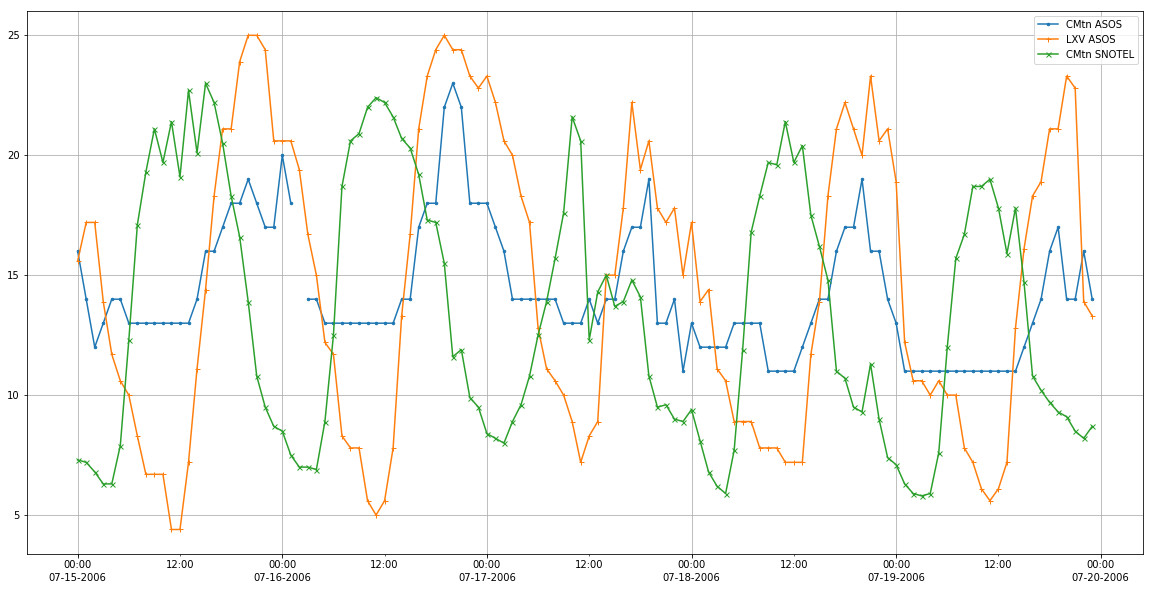

8784
8784


In [9]:

import matplotlib.dates as mdates
fig,ax1 = plt.subplots(figsize=(20,10))


tickv = pd.date_range('2006-07-15', periods=6, freq = 'H')

ax1.plot(asos_df['CMtn_Temperature_degC']['2006-07-15':'2006-07-19'], marker='.', markersize = 5, label = "CMtn ASOS")
ax1.plot(asos2_df['LXV_Temperature_degC']['2006-07-15':'2006-07-19'], marker='+', markersize = 5, label = "LXV ASOS")
ax1.plot(snotel_df['CMtnSNTL_Temp_degC']['2006-07-15':'2006-07-19'], marker='x', markersize = 5, label = "CMtn SNOTEL")
#plt.xticks(tickv)


ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('\n%m-%d-%Y')) 

ax1.grid(True)

plt.legend()
plt.show()
print(len(snotel_df['CMtnSNTL_SnowDepth_in']['2008']))
print(len(snotel_df['CMtnSNTL_SnowDepth_in']['2016']))


**Based on this graph, it looks like the warmest part of the day occurs near 22:00 UTC (3pm MST), which would be expected, for LXV and the CMtn ASOS stations.  However, the SNOTEL site appears to be shifted several hours.  This is likely due to the SNOTEL site being in MT.  THis needs to be adjusted.  First localize.**

In [10]:
asos_df.index = asos_df.index.tz_localize('UTC')
asos2_df.index = asos2_df.index.tz_localize('UTC')

print(snotel_df.head())
snotel_df.index = snotel_df.index.tz_localize('US/Mountain', ambiguous = 'NaT', errors = 'coerce')   
#snotel_df.index = snotel_df.index.tz_localize('US/Mountain').tz_convert('UTC')
print(snotel_df.head())

print(snotel_df['CMtnSNTL_SnowDepth_in']['10-29-2006'])   #This is date when DST occurs.  Notice that 1:00 is missing

                     CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in
Date_Time                                                     
2005-01-01 00:00:00                -2.1                    NaN
2005-01-01 01:00:00                 NaN                    NaN
2005-01-01 02:00:00                 NaN                    NaN
2005-01-01 03:00:00                -4.2                    NaN
2005-01-01 04:00:00                 NaN                    NaN
                           CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in
Date_Time                                                           
2005-01-01 00:00:00-07:00                -2.1                    NaN
2005-01-01 01:00:00-07:00                 NaN                    NaN
2005-01-01 02:00:00-07:00                 NaN                    NaN
2005-01-01 03:00:00-07:00                -4.2                    NaN
2005-01-01 04:00:00-07:00                 NaN                    NaN
Date_Time
2006-10-29 00:00:00-06:00    12.0
2006-10-29 02:00:00-07:00    12.

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1027: FutureWarning: The errors argument is deprecated and will be removed in a future release. Use nonexistent='NaT' or nonexistent='raise' instead.
  "instead.", FutureWarning)


Now convert SNOTEL data to UTC:

In [11]:
#snotel_df=snotel_df
snotel_df.index = snotel_df.index.tz_convert('UTC')
print(snotel_df['CMtnSNTL_SnowDepth_in']['10-29-2006'])



Date_Time
2006-10-29 00:00:00+00:00    12.0
2006-10-29 01:00:00+00:00    12.0
2006-10-29 02:00:00+00:00    12.0
2006-10-29 03:00:00+00:00    12.0
2006-10-29 04:00:00+00:00    12.0
2006-10-29 05:00:00+00:00    12.0
2006-10-29 06:00:00+00:00    12.0
2006-10-29 09:00:00+00:00    12.0
2006-10-29 10:00:00+00:00    12.0
2006-10-29 11:00:00+00:00    12.0
2006-10-29 12:00:00+00:00    12.0
2006-10-29 13:00:00+00:00    12.0
2006-10-29 14:00:00+00:00    12.0
2006-10-29 15:00:00+00:00    12.0
2006-10-29 16:00:00+00:00    11.0
2006-10-29 17:00:00+00:00    10.0
2006-10-29 18:00:00+00:00    10.0
2006-10-29 19:00:00+00:00     9.0
2006-10-29 20:00:00+00:00     8.0
2006-10-29 21:00:00+00:00     9.0
2006-10-29 22:00:00+00:00     9.0
2006-10-29 23:00:00+00:00    11.0
Name: CMtnSNTL_SnowDepth_in, dtype: float64


**Merge datasets together**

In [12]:
asos_snotel_df = pd.merge(pd.merge(snotel_df, asos_df,on='Date_Time'),asos2_df,on='Date_Time')
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2016']))

8757
8782


**Will need to fill in those missing hours still**

In [13]:
asos_snotel_df=asos_snotel_df.asfreq(freq='1H', fill_value=np.NaN)
print(asos_snotel_df['CMtnSNTL_SnowDepth_in']['10-29-2006'])


print(asos_snotel_df.describe())

print(asos_snotel_df.head())


print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2016']))

Date_Time
2006-10-29 00:00:00+00:00    12.0
2006-10-29 01:00:00+00:00    12.0
2006-10-29 02:00:00+00:00    12.0
2006-10-29 03:00:00+00:00    12.0
2006-10-29 04:00:00+00:00    12.0
2006-10-29 05:00:00+00:00    12.0
2006-10-29 06:00:00+00:00    12.0
2006-10-29 07:00:00+00:00     NaN
2006-10-29 08:00:00+00:00     NaN
2006-10-29 09:00:00+00:00    12.0
2006-10-29 10:00:00+00:00    12.0
2006-10-29 11:00:00+00:00    12.0
2006-10-29 12:00:00+00:00    12.0
2006-10-29 13:00:00+00:00    12.0
2006-10-29 14:00:00+00:00    12.0
2006-10-29 15:00:00+00:00    12.0
2006-10-29 16:00:00+00:00    11.0
2006-10-29 17:00:00+00:00    10.0
2006-10-29 18:00:00+00:00    10.0
2006-10-29 19:00:00+00:00     9.0
2006-10-29 20:00:00+00:00     8.0
2006-10-29 21:00:00+00:00     9.0
2006-10-29 22:00:00+00:00     9.0
2006-10-29 23:00:00+00:00    11.0
Freq: H, Name: CMtnSNTL_SnowDepth_in, dtype: float64
       CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  CMtn_Temperature_degC  \
count        94420.000000           82264.0000

**Now regraph.  The results now appear to be all in UTC**

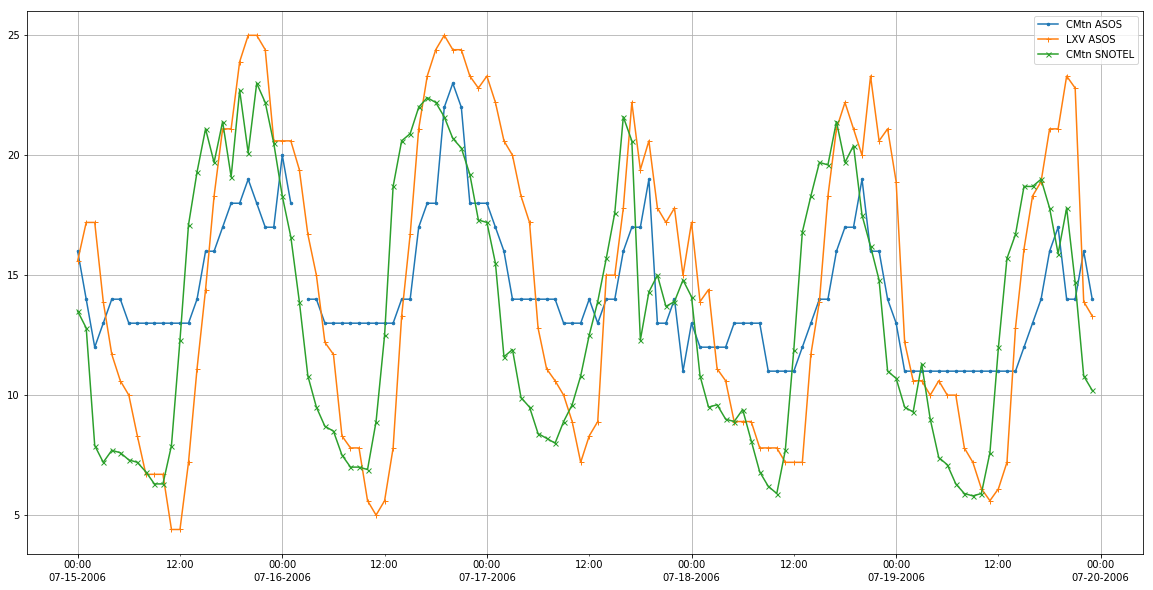

8759


In [14]:
fig,ax1 = plt.subplots(figsize=(20,10))


tickv = pd.date_range('2006-07-15', periods=6, freq = 'H')

ax1.plot(asos_snotel_df['CMtn_Temperature_degC']['2006-07-15':'2006-07-19'], marker='.', markersize = 5, label = "CMtn ASOS")
ax1.plot(asos_snotel_df['LXV_Temperature_degC']['2006-07-15':'2006-07-19'], marker='+', markersize = 5, label = "LXV ASOS")
ax1.plot(asos_snotel_df['CMtnSNTL_Temp_degC']['2006-07-15':'2006-07-19'], marker='x', markersize = 5, label = "CMtn SNOTEL")
#plt.xticks(tickv)


ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('\n%m-%d-%Y')) 

ax1.grid(True)

plt.legend()
plt.show()

print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))

**Delete empty columns**

In [15]:
del asos_snotel_df['CMtn_Pressure_hp']
del asos_snotel_df['CMtn_6hr_Precipitation_mm']  
print(asos_snotel_df.describe())
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2016']))

       CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  CMtn_Temperature_degC  \
count        94420.000000           82264.000000           76097.000000   
mean             1.415487              21.504133               1.551296   
std              9.103131              21.262656               9.315911   
min            -33.100000              -3.000000             -28.000000   
25%             -4.900000               0.000000              -5.000000   
50%              1.400000              18.000000               1.000000   
75%              7.800000              40.000000               9.000000   
max             25.100000             187.000000              24.000000   

       CMtn_Dewpoint_degC  CMtn_WindDirection_deg  CMtn_WindSpeed_mps  \
count        75969.000000            70663.000000        70663.000000   
mean            -8.928932              229.713853            6.094243   
std              8.135904               72.905938            3.436164   
min            -45.000000       

## Determining Outliers

**Let's make some box plots**

In [16]:
print(asos_snotel_df.keys())

Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp',
       'LXV_WindDirection_deg', 'LXV_WindSpeed_mps', 'LXV_CloudCover_oktas',
       'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm'],
      dtype='object')


8759
8759
8759
8759
8759
8759
8759
8759
8759
8759
8759
8759
8759


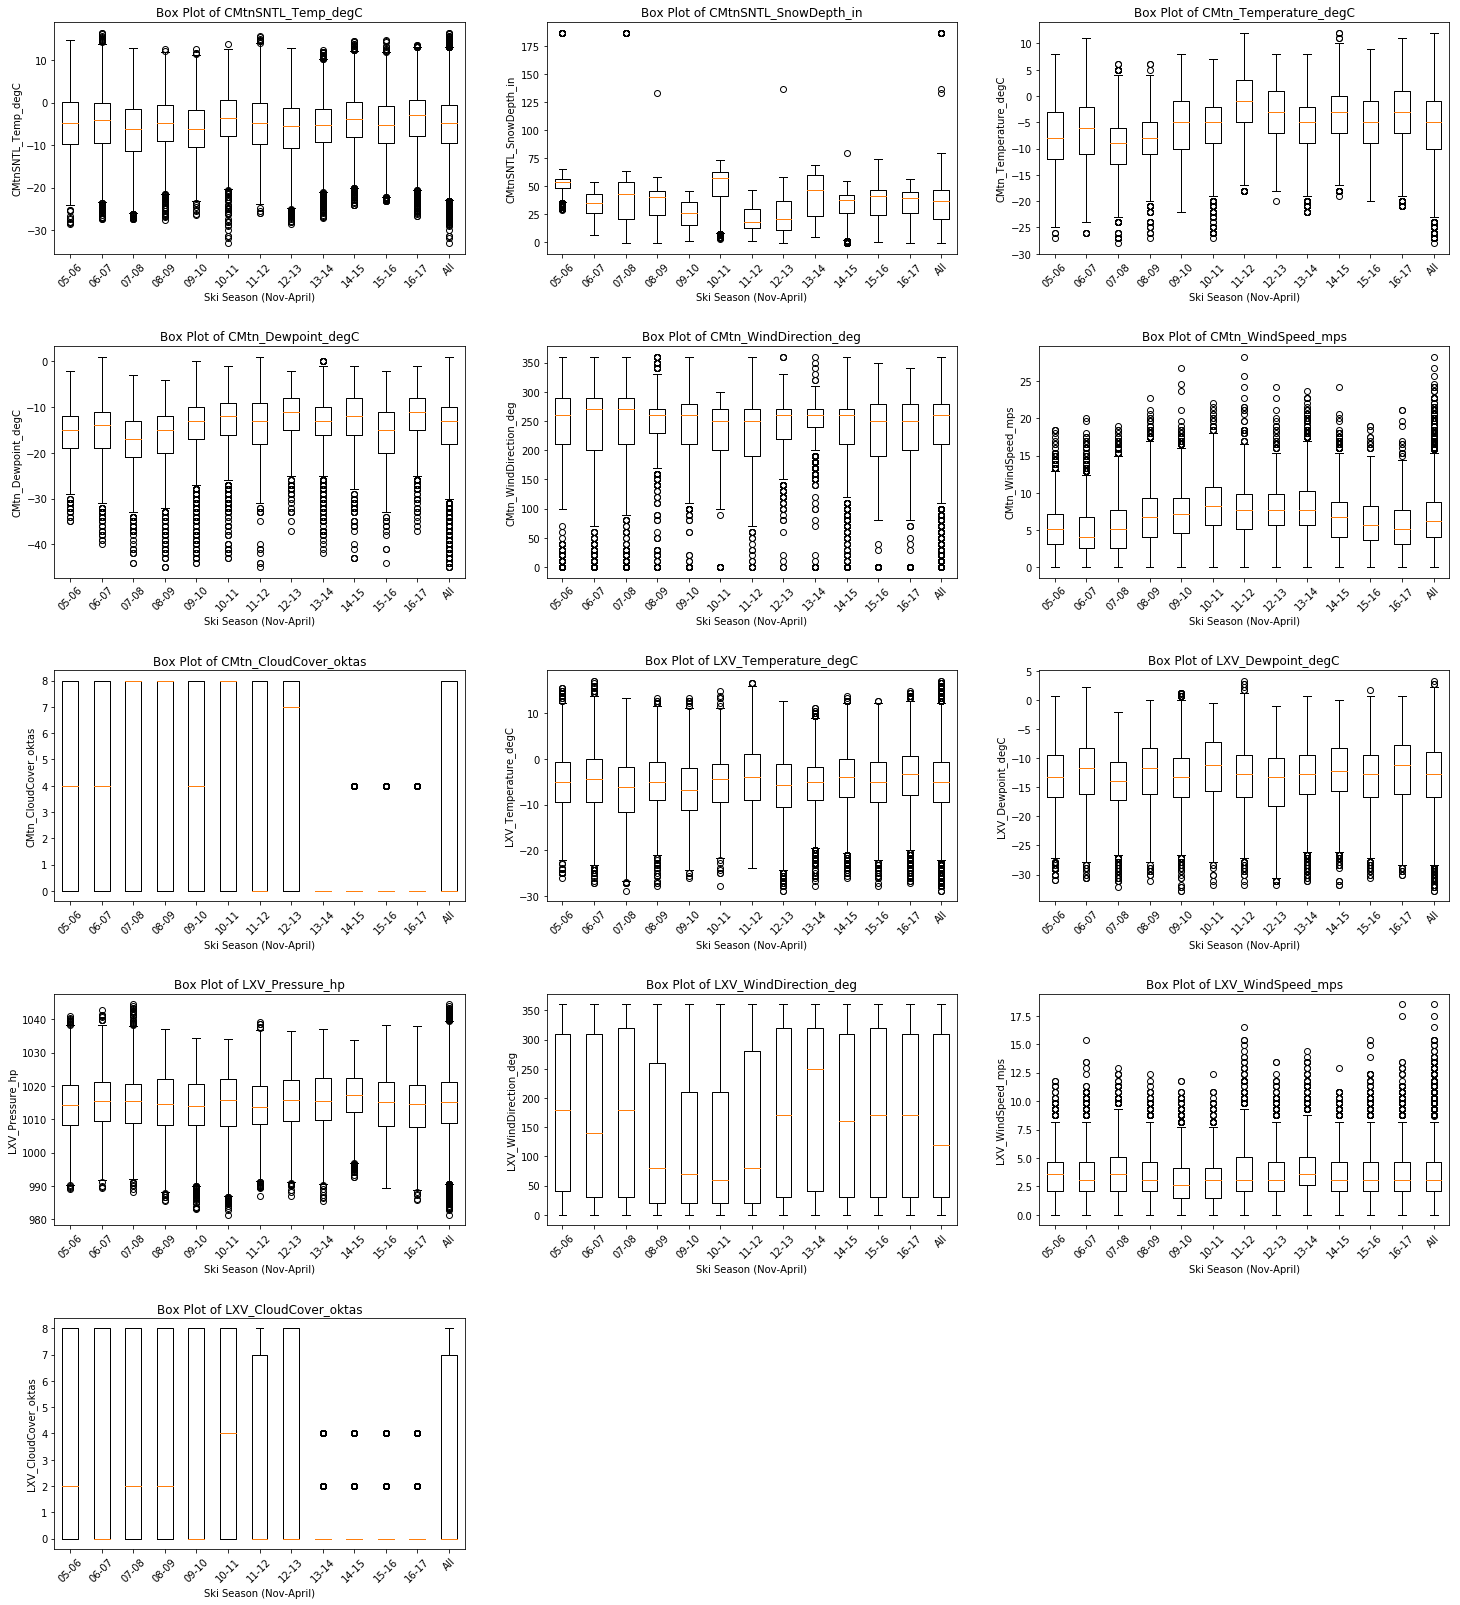

In [17]:
fig = plt.figure(figsize=(25,40))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


keys = ['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC', \
       'CMtn_Dewpoint_degC',  'CMtn_WindDirection_deg', \
       'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', \
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', \
       'LXV_WindDirection_deg', 'LXV_WindSpeed_mps', 'LXV_CloudCover_oktas']


for k in range(len(keys)):
    ax = plt.subplot(7, 3, k+1)

#fig.suptitle = 'Boxplot by Ski Season (November - April)'



    filtered_data = asos_snotel_df[keys[k]][~np.isnan(asos_snotel_df[keys[k]])]

    merged_seasons =  pd.concat([filtered_data['11-2005':'04-2006'], filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

    filtered_data2 = [filtered_data['11-2005':'04-2006'], filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]

    plot =ax.boxplot(filtered_data2)
    plt.title('Box Plot of ' + keys[k])
    labels = ['05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
    ax.set_xticklabels(labels, rotation = 45)
    ax.set_xlabel('Ski Season (Nov-April)')
    ax.set_ylabel(keys[k])
    print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))

**These box plots do illuminate some interesting data characteristics to be aware. The distributions of data seem reasonable for all variables except 2010-2011 Wind Direction,  2013-2017 Cloudcover, and 07-08, 08-09, 12-13 Snow Depth Data.  One would expect there to be winds in virtually every direction over a season; however it does not appear that happened in years 10-11.  This could be due to a large amount of data missing that year.  CloudCover seems very anommalous for years 13-17 as the only value looks to be 4 at the Copper Mtn site; and 2 & 4 at the Leadville site.  Finally, the values which fall far outside the distribution of the snow depth data are also questionable. Additional investigation will be made by looking at timeseries plots..  **

                           CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  \
Date_Time                                                              
2006-01-01 01:00:00+00:00                -1.3                   43.0   
2006-01-01 02:00:00+00:00                -2.7                   43.0   
2006-01-01 03:00:00+00:00                -2.6                   43.0   
2006-01-01 04:00:00+00:00                -2.5                   43.0   
2006-01-01 05:00:00+00:00                -3.2                   42.0   

                           CMtn_Temperature_degC  CMtn_Dewpoint_degC  \
Date_Time                                                              
2006-01-01 01:00:00+00:00                   -1.0                -7.0   
2006-01-01 02:00:00+00:00                   -3.0                -8.0   
2006-01-01 03:00:00+00:00                   -4.0                -8.0   
2006-01-01 04:00:00+00:00                   -4.0                -9.0   
2006-01-01 05:00:00+00:00                   -5.0               

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


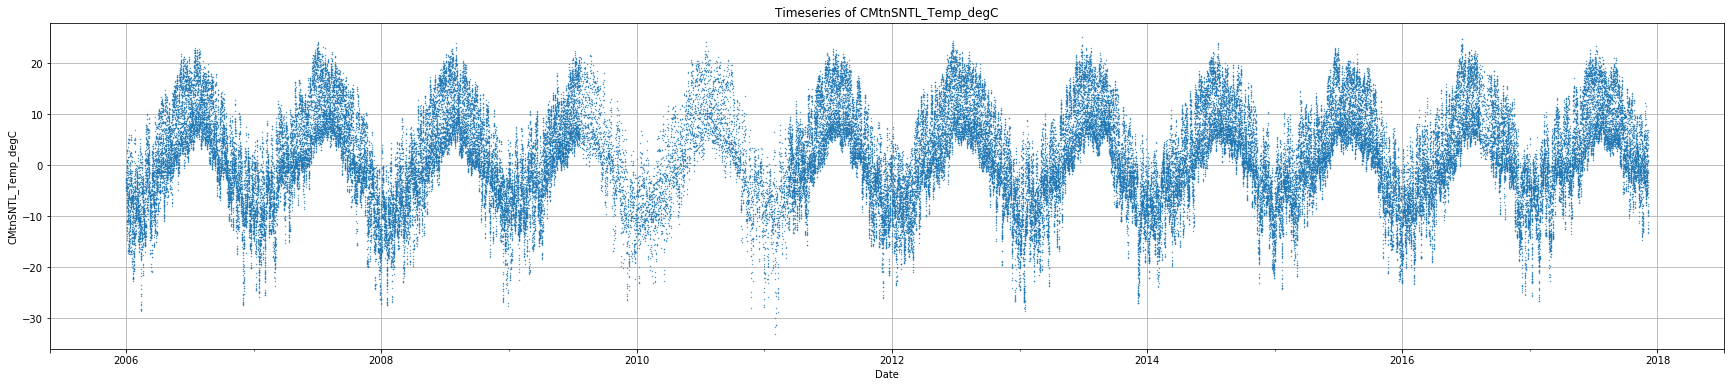

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


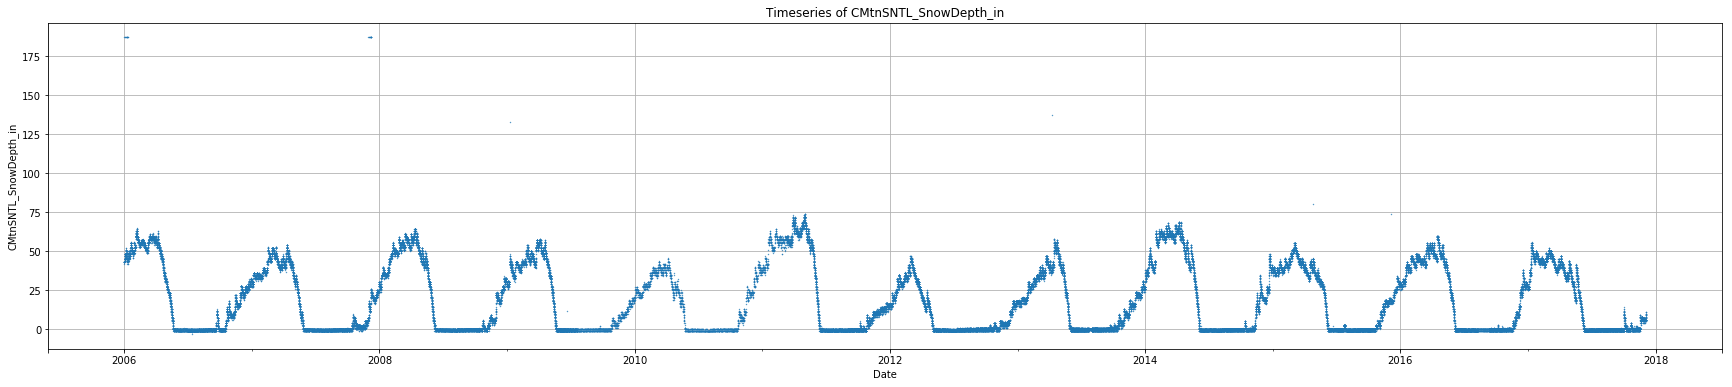

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


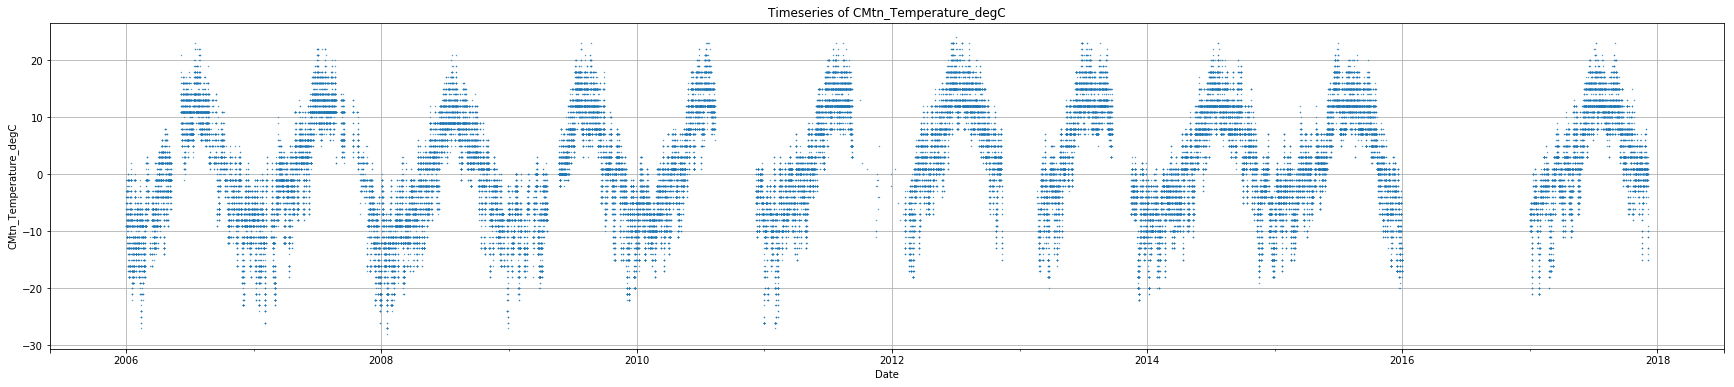

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


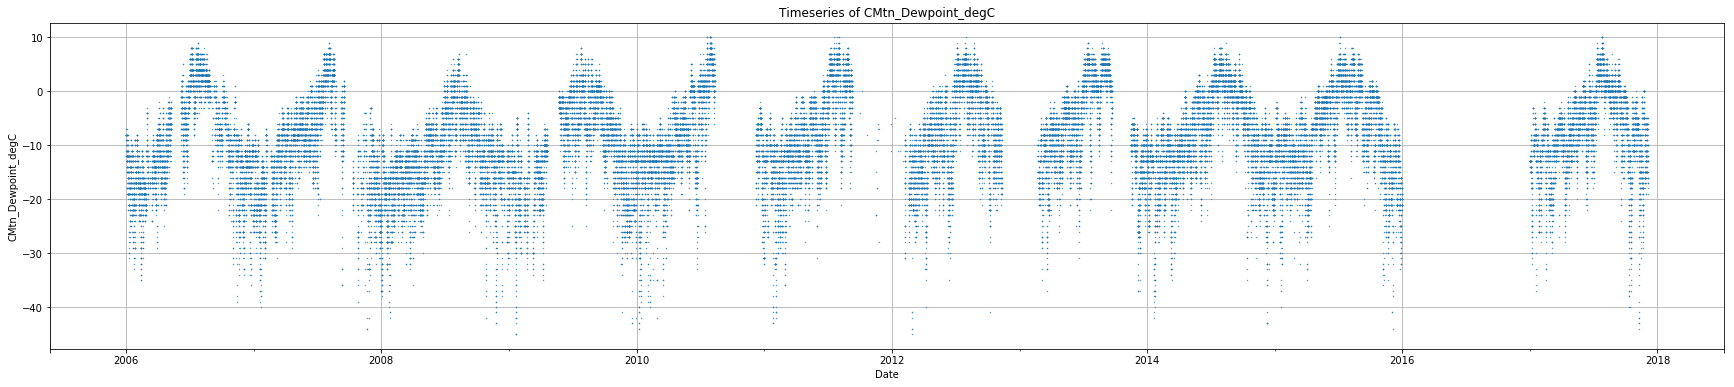

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


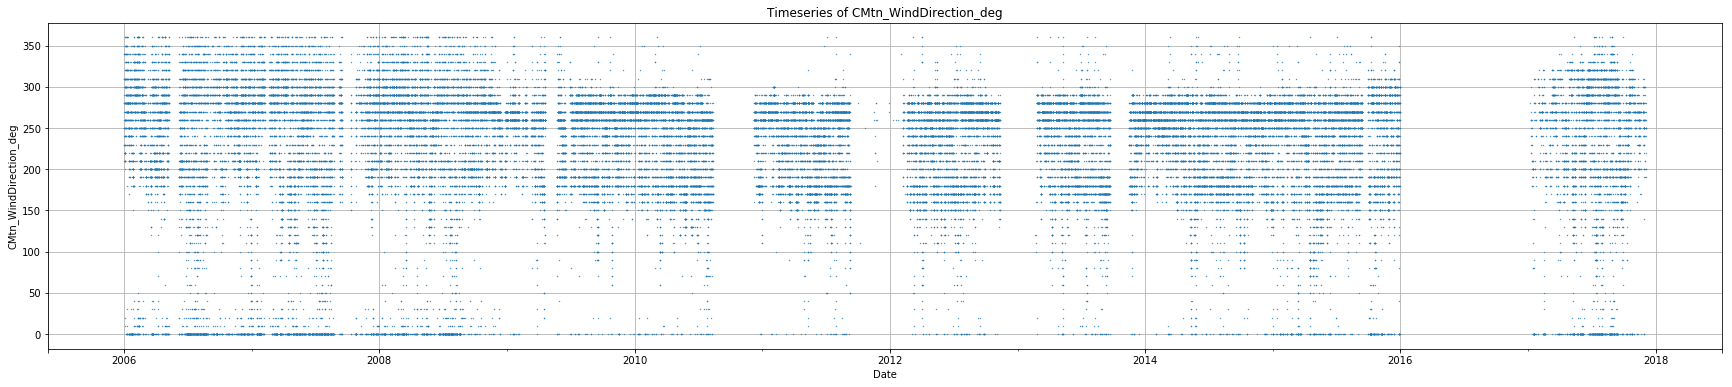

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


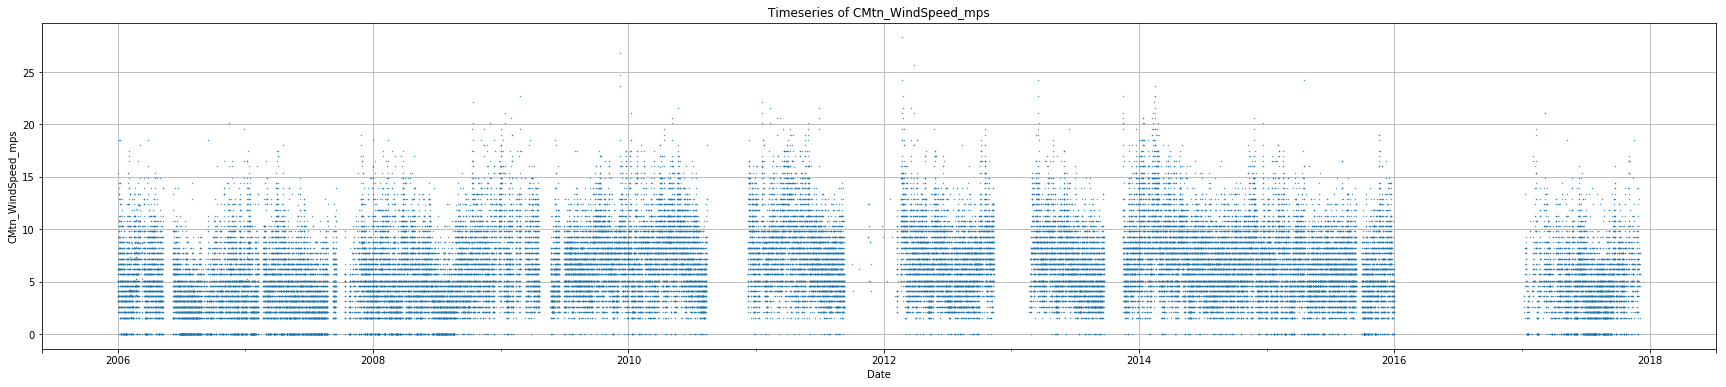

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


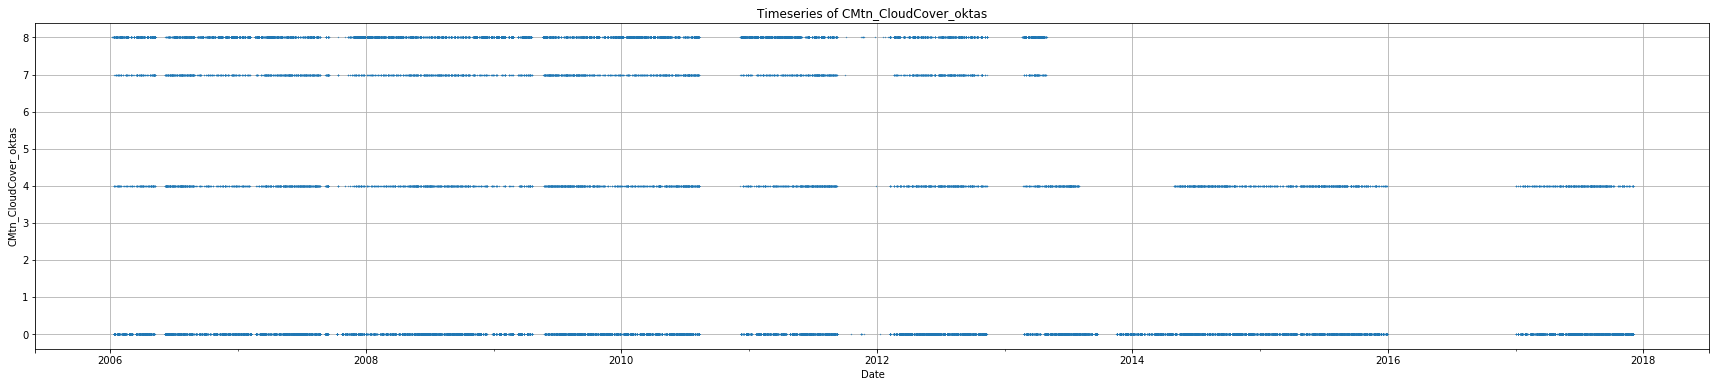

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


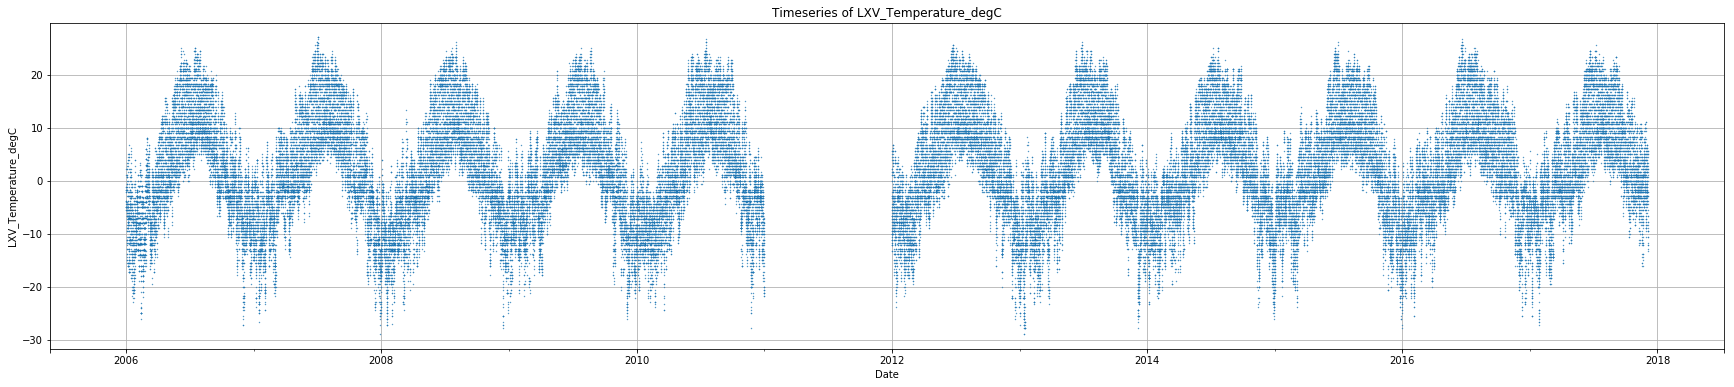

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


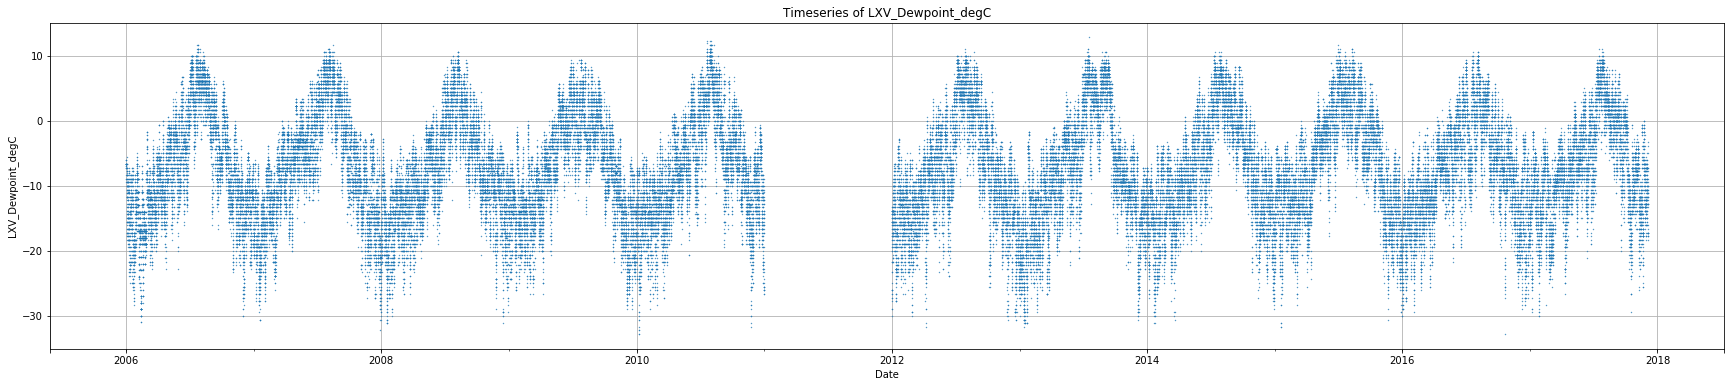

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


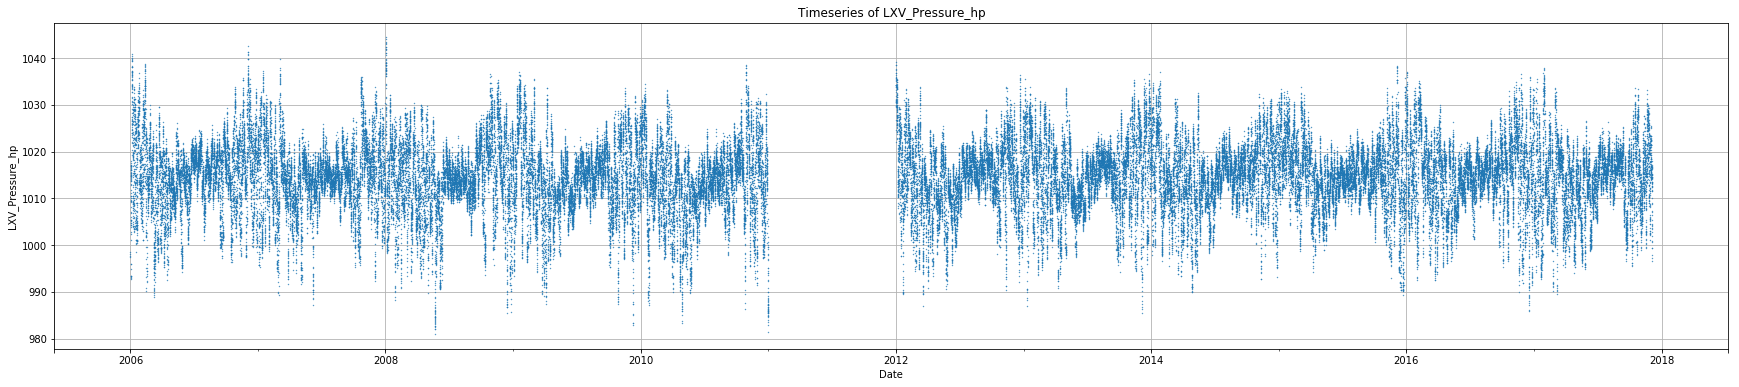

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


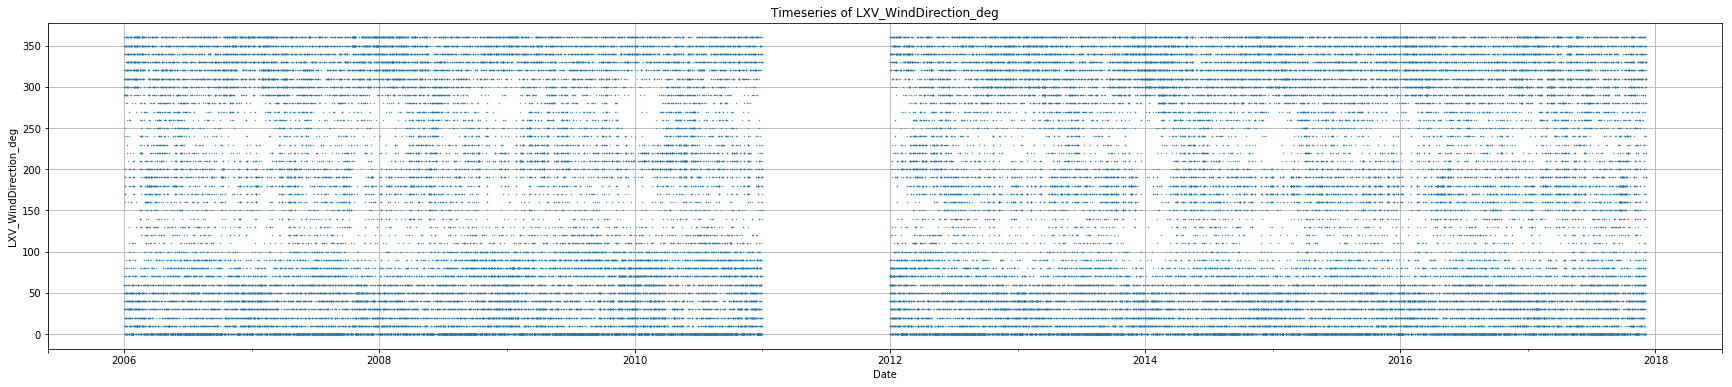

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


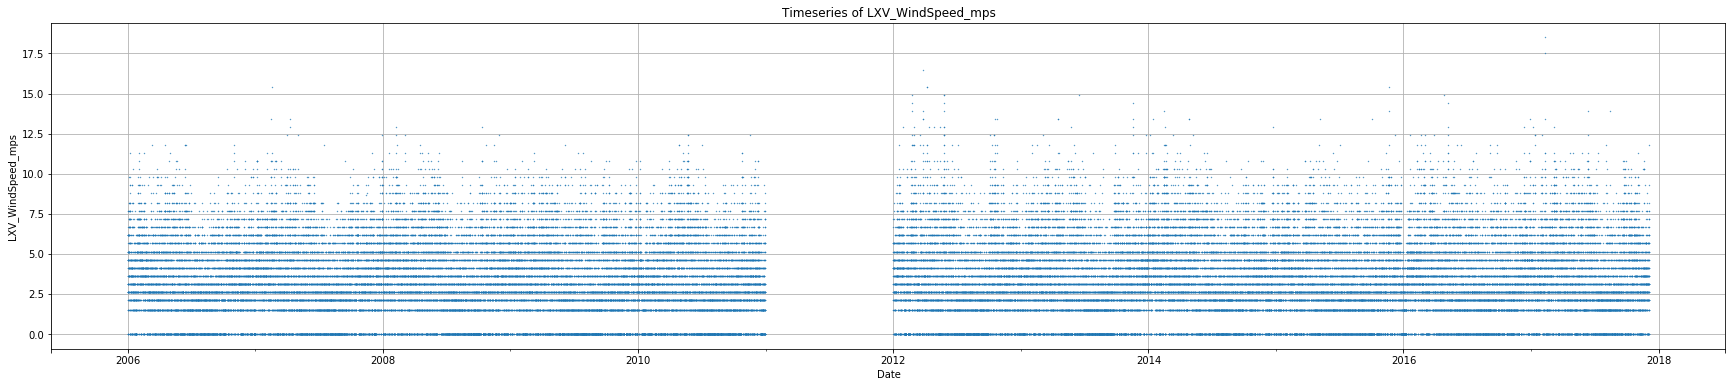

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


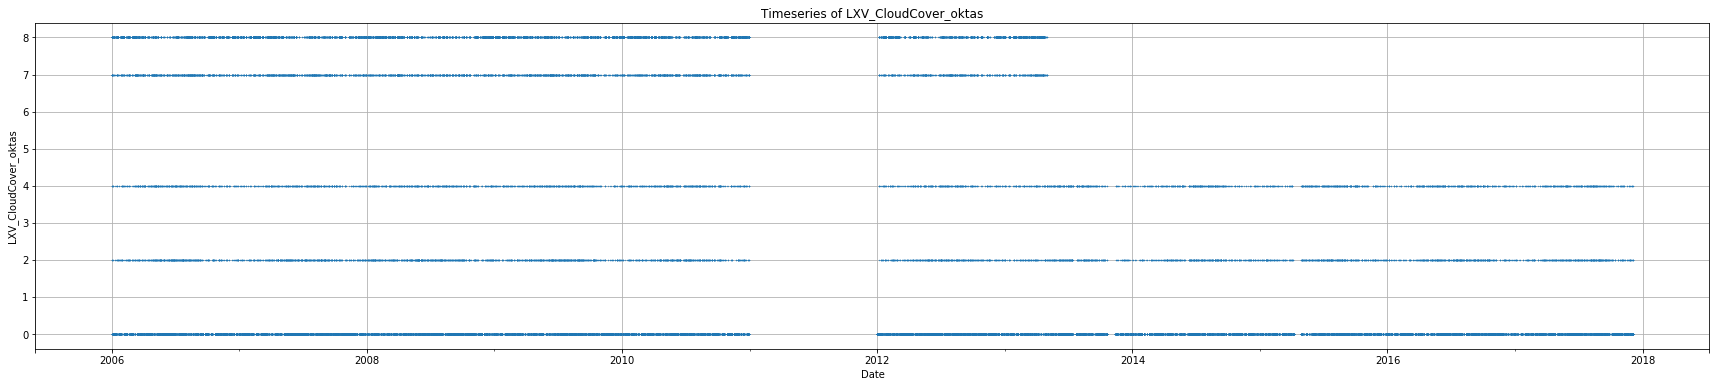

In [18]:
ax = None

print(asos_snotel_df.head())

#keys = ['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in']

#keys = ['CMtn_Pressure_hp']


#fig.subplots_adjust(hspace=0.3, wspace=0.1)
for k in range(len(keys)):
    fig = plt.figure(figsize=(30,6))
    #ax = plt.subplot(15, 1, k+1)
    ax = None
    ax = asos_snotel_df[keys[k]]['2005':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 0.75)
    ax.set_xlabel("Date")
    ax.set_ylabel(keys[k])
    
    plt.title("Timeseries of " + keys[k])
 
    plt.grid()
    plt.axis('tight')
    
    plt.show()
    
    fig.clf()
    plt.close()
  

#plt.show()



**Cloud cover data is very suspicious beginning in year 2013, so all data after that point will be removed at both the Copper Mountain and the Leadville site**

In [19]:
asos_snotel_df['CMtn_CloudCover_oktas']['2013':'2017'] = np.NaN
asos_snotel_df['LXV_CloudCover_oktas']['2013':'2017'] = np.NaN

**Lets take a look at total snow depths by year**

In [20]:
years = ['2006', '2007', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

for y in years:
    print("Year: "+ y + " - Snow Depth Max: " + str(round(asos_snotel_df['CMtnSNTL_SnowDepth_in'][y].max(),2)) + " - Snow Depth Min: " + str(round(asos_snotel_df['CMtnSNTL_SnowDepth_in'][y].min(),2)))
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))

Year: 2006 - Snow Depth Max: 187.0 - Snow Depth Min: -3.0
Year: 2007 - Snow Depth Max: 187.0 - Snow Depth Min: -1.0
Year: 2007 - Snow Depth Max: 187.0 - Snow Depth Min: -1.0
Year: 2008 - Snow Depth Max: 64.0 - Snow Depth Min: -1.0
Year: 2009 - Snow Depth Max: 133.0 - Snow Depth Min: -1.0
Year: 2010 - Snow Depth Max: 46.0 - Snow Depth Min: -1.0
Year: 2011 - Snow Depth Max: 74.0 - Snow Depth Min: -1.0
Year: 2012 - Snow Depth Max: 47.0 - Snow Depth Min: -1.0
Year: 2013 - Snow Depth Max: 137.0 - Snow Depth Min: -1.0
Year: 2014 - Snow Depth Max: 69.0 - Snow Depth Min: -1.0
Year: 2015 - Snow Depth Max: 80.0 - Snow Depth Min: -1.0
Year: 2016 - Snow Depth Max: 60.0 - Snow Depth Min: -1.0
Year: 2017 - Snow Depth Max: 56.0 - Snow Depth Min: -1.0
8759


**It can be seen from the snow depth plot there are various spikes in the dataset which are physically unrealistic.  Therefore, snowdepth values >100 will be thrown out, along with snowdepth values greater then 70 in year 2015.  Also, snow depth values less then -100 will be eliminated: **

In [21]:
plt.figure(figsize=(15,5))

xx=(asos_snotel_df['CMtnSNTL_SnowDepth_in']<-100) | (asos_snotel_df['CMtnSNTL_SnowDepth_in']>100) | (asos_snotel_df['CMtnSNTL_SnowDepth_in']['2015']>70)
asos_snotel_df['CMtnSNTL_SnowDepth_in'][xx]=np.NaN
#snotel_filled_df = snotel_df.interpolate(limit=3)


<Figure size 1080x360 with 0 Axes>

**Taking a look at the snow depth box plot after cleaned up**

Text(0,0.5,'Snow Depth (inches)')

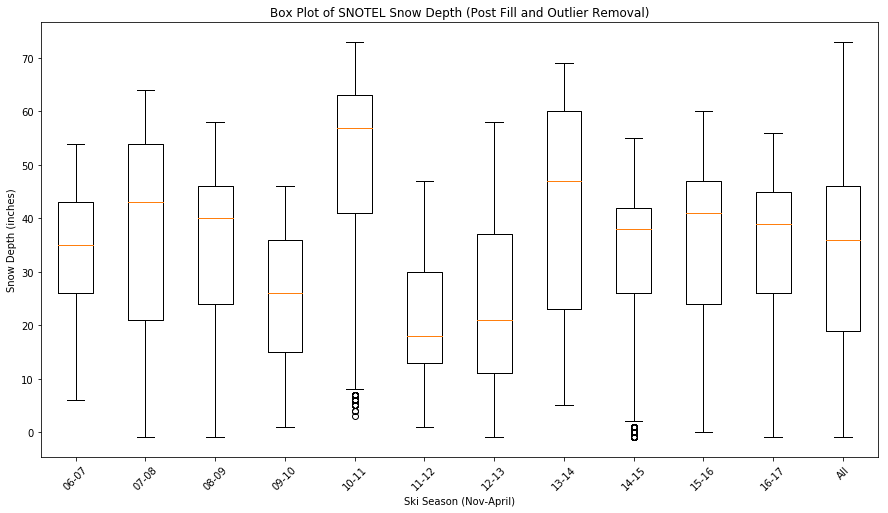

In [22]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = asos_snotel_df['CMtnSNTL_SnowDepth_in'][~np.isnan(asos_snotel_df['CMtnSNTL_SnowDepth_in'])]


merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]

plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth (Post Fill and Outlier Removal)')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


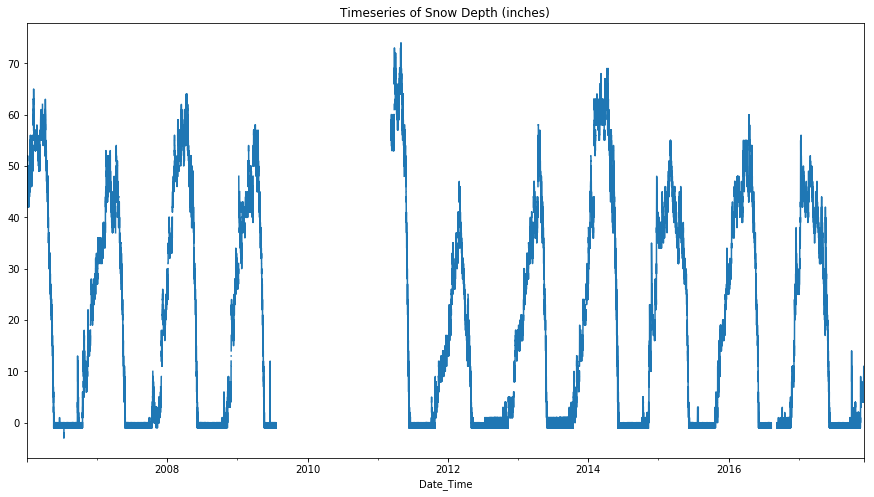

Date_Time
2006-01-01 01:00:00+00:00    43.0
2006-01-01 02:00:00+00:00    43.0
2006-01-01 03:00:00+00:00    43.0
2006-01-01 04:00:00+00:00    43.0
2006-01-01 05:00:00+00:00    42.0
2006-01-01 06:00:00+00:00    43.0
2006-01-01 07:00:00+00:00    43.0
2006-01-01 08:00:00+00:00    43.0
2006-01-01 09:00:00+00:00     NaN
2006-01-01 10:00:00+00:00    43.0
2006-01-01 11:00:00+00:00    43.0
2006-01-01 12:00:00+00:00    43.0
2006-01-01 13:00:00+00:00    44.0
2006-01-01 14:00:00+00:00    44.0
2006-01-01 15:00:00+00:00    44.0
2006-01-01 16:00:00+00:00    43.0
2006-01-01 17:00:00+00:00    47.0
2006-01-01 18:00:00+00:00    48.0
2006-01-01 19:00:00+00:00    48.0
2006-01-01 20:00:00+00:00    48.0
2006-01-01 21:00:00+00:00    48.0
2006-01-01 22:00:00+00:00    47.0
2006-01-01 23:00:00+00:00    48.0
2006-01-02 00:00:00+00:00    48.0
2006-01-02 01:00:00+00:00    48.0
2006-01-02 02:00:00+00:00    48.0
2006-01-02 03:00:00+00:00    48.0
2006-01-02 04:00:00+00:00    48.0
2006-01-02 05:00:00+00:00    48.0
2006

In [23]:
fig2 = plt.figure(figsize=(15,8))

asos_snotel_df['CMtnSNTL_SnowDepth_in']['2005':'2017'].plot(linewidth=None,  markersize = 0.00001)
ax.set_xlabel("Date")
ax.set_ylabel('CMtnSNTL_SnowDepth_in')
plt.title("Timeseries of Snow Depth (inches)")
  

plt.show()
print(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006'])
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))

### Interpolate missing values up to 3 hours

In [24]:
print(asos_snotel_df.info())
asos_snotel_fill_df = asos_snotel_df.copy()

asos_snotel_df = asos_snotel_df.interpolate(how = 'linear', limit = 3)

print('*********************')
print(asos_snotel_df.info())
print(len(asos_snotel_df['2006']))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104543 entries, 2006-01-01 01:00:00+00:00 to 2017-12-04 23:00:00+00:00
Freq: H
Data columns (total 16 columns):
CMtnSNTL_Temp_degC           94420 non-null float64
CMtnSNTL_SnowDepth_in        82235 non-null float64
CMtn_Temperature_degC        76097 non-null float64
CMtn_Dewpoint_degC           75969 non-null float64
CMtn_WindDirection_deg       70663 non-null float64
CMtn_WindSpeed_mps           70663 non-null float64
CMtn_CloudCover_oktas        44260 non-null float64
CMtn_1hr_Precipitation_mm    1059 non-null float64
LXV_Temperature_degC         95396 non-null float64
LXV_Dewpoint_degC            95394 non-null float64
LXV_Pressure_hp              92887 non-null float64
LXV_WindDirection_deg        88888 non-null float64
LXV_WindSpeed_mps            95164 non-null float64
LXV_CloudCover_oktas         50927 non-null float64
LXV_1hr_Precipitation_mm     94446 non-null float64
LXV_6hr_Precipitation_mm     5063 non-null float64
dtype

### Create 12 hr snowfall dataframe by using 12hr snowdepth difference

In [25]:
import matplotlib.dates as mdates
#fig = plt.figure(figsize=(10,5))


#Calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
asos_snotel_df['CMtnSNTL_12hr_SNWD_in'] = asos_snotel_df['CMtnSNTL_SnowDepth_in'].resample('12H').first()
asos_snotel_df['CMtnSNTL_12hr-dSNWD_in'] = asos_snotel_df['CMtnSNTL_12hr_SNWD_in']-asos_snotel_df['CMtnSNTL_12hr_SNWD_in'].shift(+12)
asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in'] = asos_snotel_df['CMtnSNTL_12hr-dSNWD_in']
asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in'] = asos_snotel_df['CMtnSNTL_12hr-dSNWD_in'].shift(-12)


asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'] = asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in'][asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in']>=3]
asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_gte3_in'] = asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in'][asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in']>=3]

print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in'].describe())
print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())

print(len(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['2006']))
print(len(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006']))

#fig = plt.figure(figsize=(30,15))
#plt.subplot(2,1, 1)
#plt.subplots_adjust(hspace=0.5, wspace=0.2)

count    8679.000000
mean       -0.003459
std         1.401909
min        -7.777778
25%        -1.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_in, dtype: float64
count    339.000000
mean       4.607276
std        2.124908
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64
8759
8759


**Plot some snowfall values where known snowfall event occurs to see if we got this right**

count    339.000000
mean       4.607276
std        2.124908
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


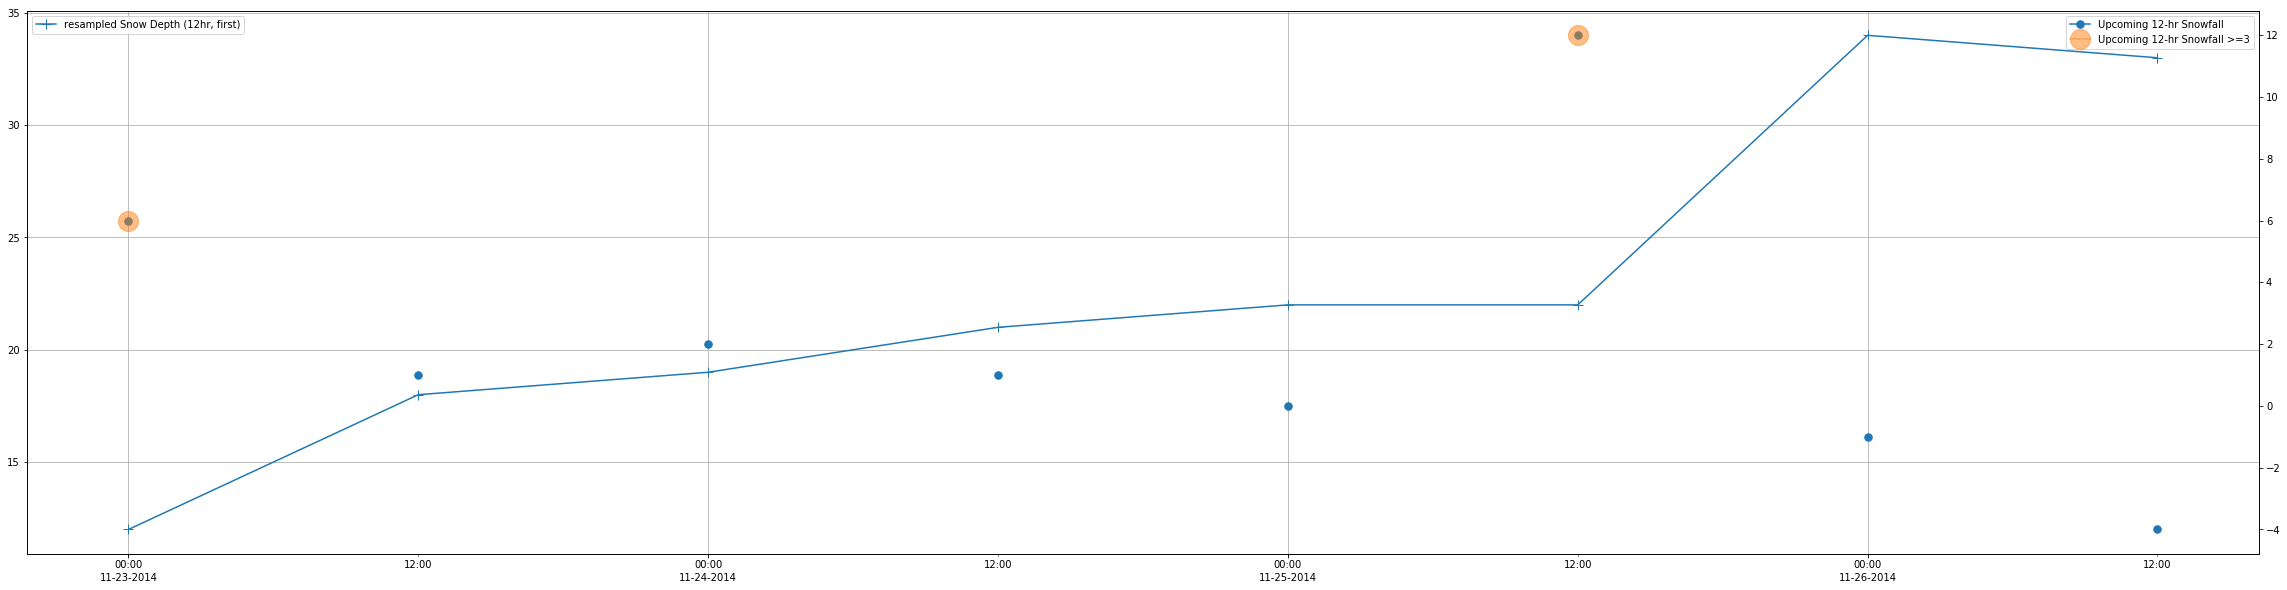

In [26]:
fig, ax1 = plt.subplots(figsize=(40,10))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['11-23-2014':'11-26-2014'].dropna(), marker='+', markersize = 10, linestyle='-', label = "resampled Snow Depth (12hr, first)")
#ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['11-23-2014':'11-26-2014'].shift(+1), marker='+',linestyle='-', markersize = 10 label = "shifted +12hr")
#ax2.plot(asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in']['11-23-2014':'11-26-2014'], marker='x', markersize = 15,  label = "Past 12-hr Snowfall")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in']['11-23-2014':'11-26-2014'], marker='.', markersize = 15,  label = "Upcoming 12-hr Snowfall")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['11-23-2014':'11-26-2014'], marker='.', markersize = 40, alpha = 0.5,  label = "Upcoming 12-hr Snowfall >=3")

#ax2 = asos_snotel_UA_df['CMtn_1hr_Precipitation_mm']['01-06-2009':'01-09-2009'].plot(marker='+', markersize = 10, secondary_y = True)

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('\n%m-%d-%Y')) 
#ax00.set_xlim(100, 12)

#plt.plot(shifted_df, linestyle = '-', linewidth = 10)
#print(shifted_df.describe)

#xlabel('Item (s)')
#ylabel('Value')
#title('Python Line Chart: Plotting numbers')

#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax1.grid(True)
#ax2.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



#print(asos_snotel_df['12hr-dSNWD_in'].describe())
print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())

**Next plot timeseries**

count    339.000000
mean       4.607276
std        2.124908
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64
8760


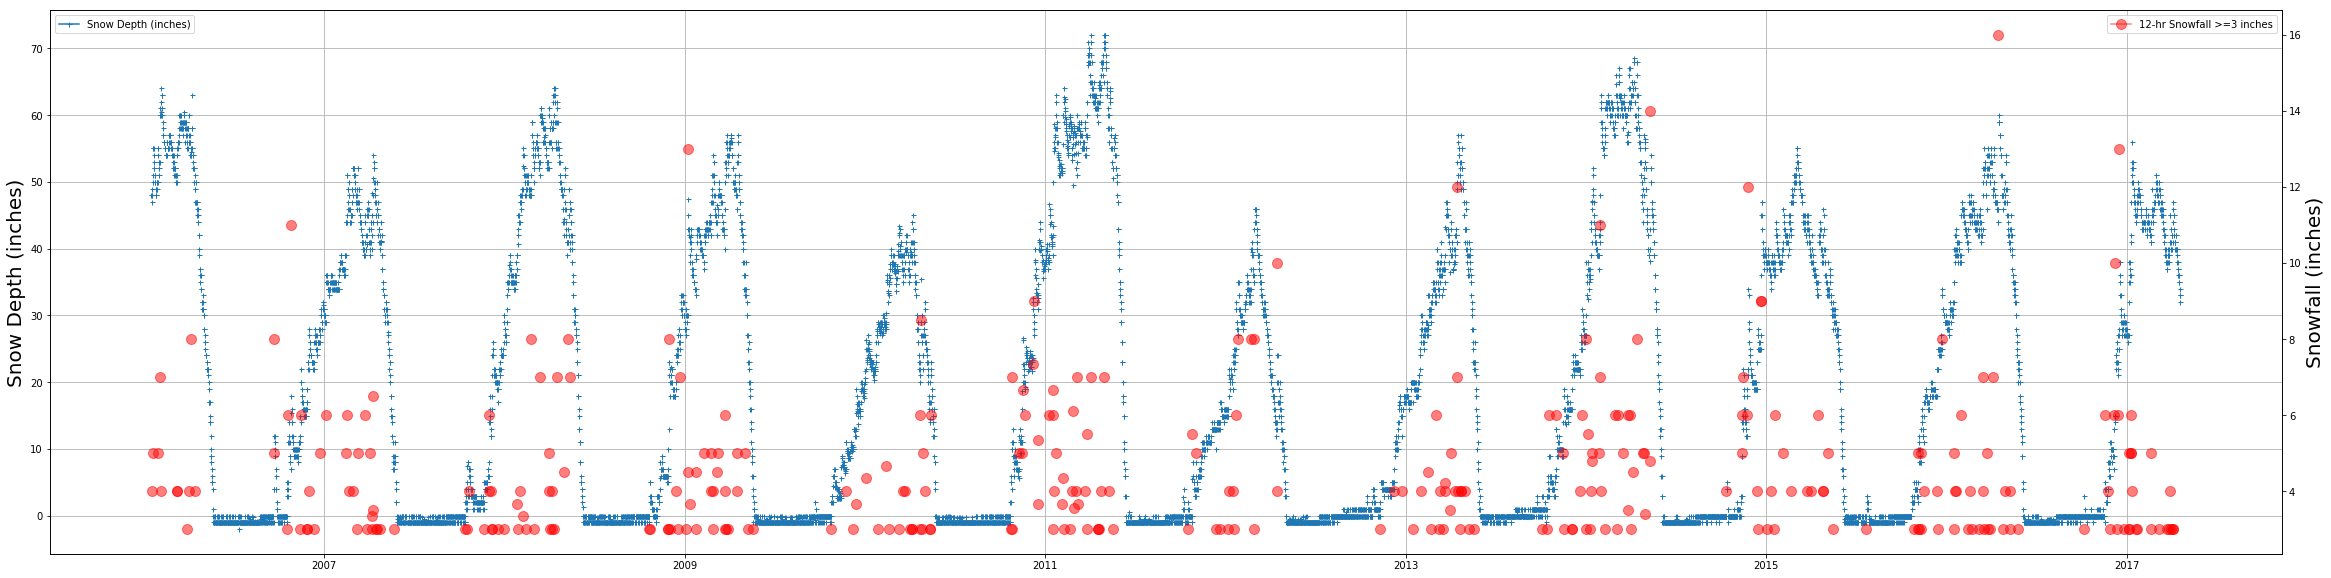

In [27]:
fig, ax1 = plt.subplots(figsize=(40,10))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['01-16-2006':'04-19-2017'], marker='+', markersize = 5, label = "Snow Depth (inches)")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['01-16-2006':'04-19-2017'], marker='.', markersize = 20, alpha = 0.5,  label = "12-hr Snowfall >=3 inches" , color = 'r')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_ylabel('Snow Depth (inches)', size = 20)
ax2.set_ylabel('Snowfall (inches)', size = 20)
print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())
print(len(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['2007']))



There is a snowfall value of 3" which occurs in summer of 2015.  Let's take a closer look at this by plotting temperatures

count    339.000000
mean       4.607276
std        2.124908
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


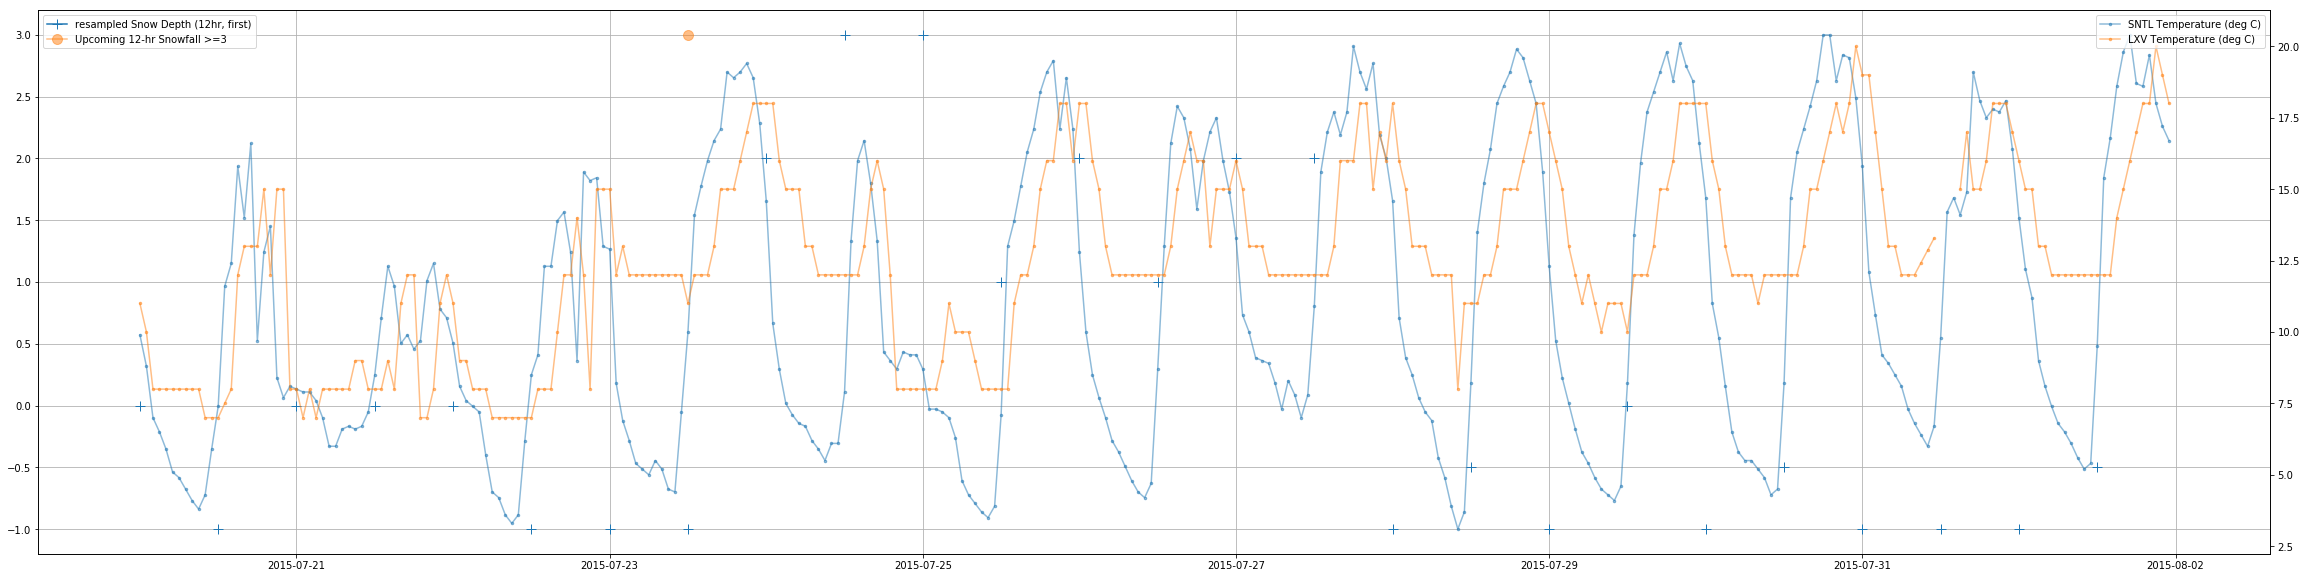

In [28]:
fig, ax1 = plt.subplots(figsize=(40,10))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['07-20-2015':'08-01-2015'], marker='+', markersize = 10, label = "resampled Snow Depth (12hr, first)")
ax1.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['07-20-2015':'08-01-2015'], marker='.', markersize = 20, alpha = 0.5,  label = "Upcoming 12-hr Snowfall >=3")
ax2.plot(asos_snotel_df['CMtnSNTL_Temp_degC']['07-20-2015':'08-01-2015'], marker='.', markersize = 5, alpha = 0.5,  label = "SNTL Temperature (deg C)")
ax2.plot(asos_snotel_df['CMtn_Temperature_degC']['07-20-2015':'08-01-2015'], marker='.', markersize = 5, alpha = 0.5,  label = "LXV Temperature (deg C)")
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())

These snowfall value will be removed as temps do not support this value

count    338.000000
mean       4.612032
std        2.126252
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


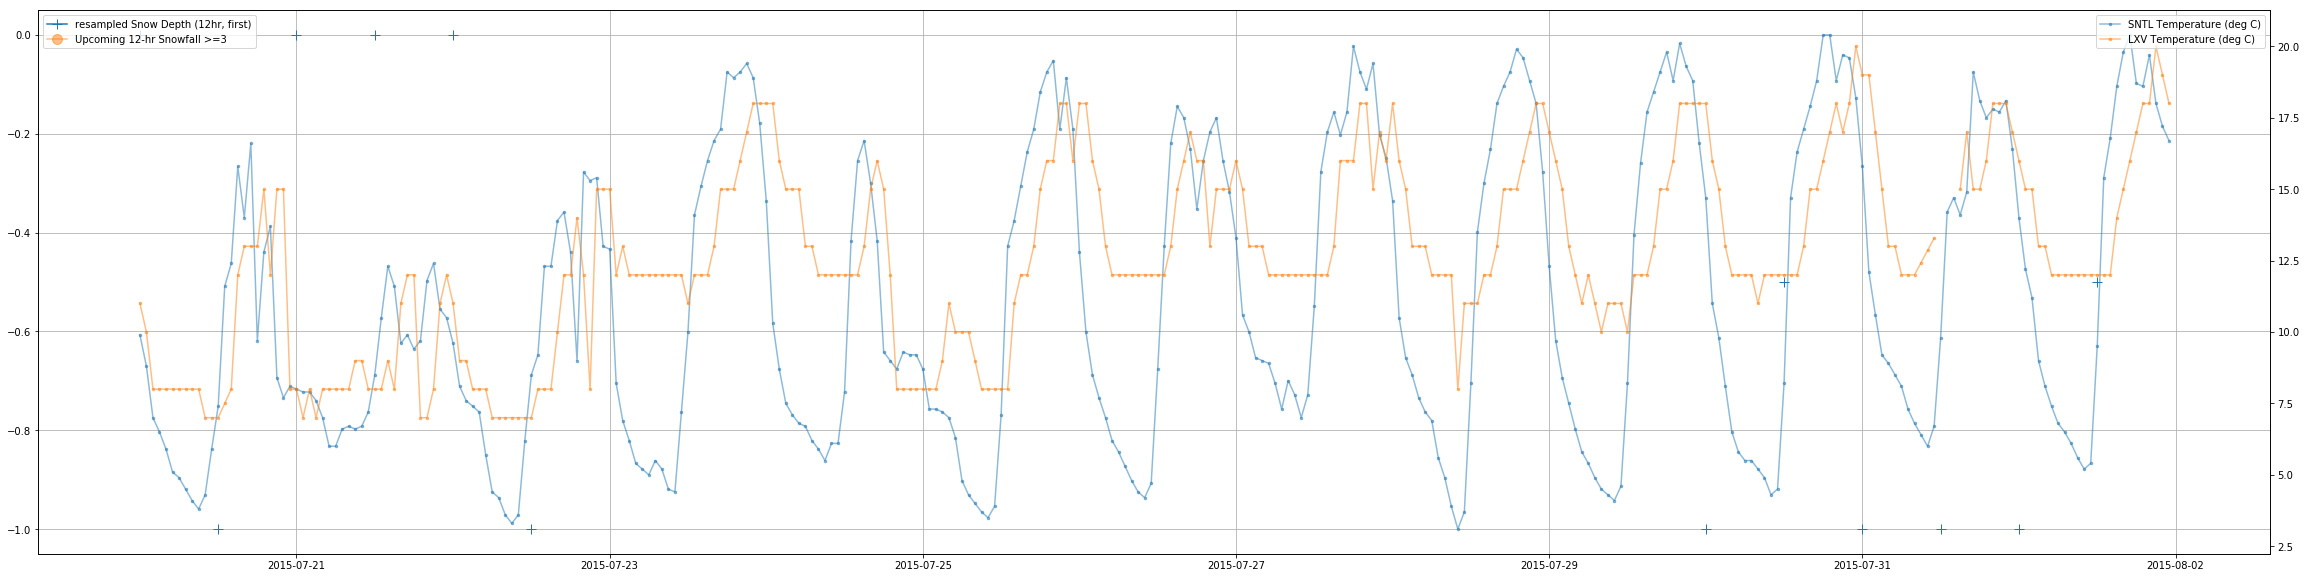

In [29]:
asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['07-23-2015':'07-29-2015'] = np.NaN
asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['07-23-2015':'07-29-2015'] = np.NaN

fig, ax1 = plt.subplots(figsize=(40,10))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['07-20-2015':'08-01-2015'], marker='+', markersize = 10, label = "resampled Snow Depth (12hr, first)")
ax1.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['07-20-2015':'08-01-2015'], marker='.', markersize = 20, alpha = 0.5,  label = "Upcoming 12-hr Snowfall >=3")
ax2.plot(asos_snotel_df['CMtnSNTL_Temp_degC']['07-20-2015':'08-01-2015'], marker='.', markersize = 5, alpha = 0.5,  label = "SNTL Temperature (deg C)")
ax2.plot(asos_snotel_df['CMtn_Temperature_degC']['07-20-2015':'08-01-2015'], marker='.', markersize = 5, alpha = 0.5,  label = "LXV Temperature (deg C)")
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())

**Create some figs and tables for report**

In [34]:
all_yrs = (asos_snotel_df.index >= '01-01-2006') & (asos_snotel_df.index < '01-01-2018')
test_yrs_A=  ((asos_snotel_df.index >= '01-01-2006') & (asos_snotel_df.index < '01-01-2007')) | ((asos_snotel_df.index >= '01-01-2017') & (asos_snotel_df.index< '01-01-2018'))
train_yrs_A = (asos_snotel_df.index >= '01-01-2007') & (asos_snotel_df.index < '01-01-2017')

train_yrs_B = ((asos_snotel_df.index >= '01-01-2006') & (asos_snotel_df.index < '01-01-2014')) | ((asos_snotel_df.index >= '01-01-2015') & (asos_snotel_df.index < '01-01-2018'))
test_yrs_B = (asos_snotel_df.index >= '01-01-2014') & (asos_snotel_df.index < '01-01-2015')



#u = "'"+"2006"+"'"+":"+"'"+"2017"+"'"

import statistics as sts
print(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['2006'].var())
from tabulate import tabulate
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2015', '2016', '2017', all_yrs, train_yrs_A, train_yrs_B, test_yrs_A, test_yrs_B]
year_lbls = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2015', '2016', '2017', 'All', 'Training Set A', 'Training Set A', 'Test Set A', 'Test Set B',]
counts = []
means = []
maxes = []
sd_missings =[]
std_devs=[]
medians = []
for year in years:
    print(year)
    counts.append(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].count())
    maxes.append((round(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].max(),1)))
    means.append(round(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].mean(),1))
    medians.append(round(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].median(),1))
    sd_missings.append(round(asos_snotel_df['CMtnSNTL_12hr_SNWD_in'][year].count()/len(asos_snotel_df['CMtnSNTL_12hr_SNWD_in'][year])/12*100,2))
    std_devs.append(round(np.std(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].dropna()),2))
     
    print(asos_snotel_df['CMtnSNTL_12hr_SNWD_in'][year].count(),len(asos_snotel_df['CMtnSNTL_12hr_SNWD_in'][year])/12)

tbl = zip(year_lbls, counts, means, medians, maxes, std_devs,sd_missings )  
    
print(tabulate(tbl, headers=['Year', 'Number 12hr Snowfall Events >=3', 'Mean', 'Median','Max', 'Std Deviation', '%Missing SnowDepth'], tablefmt='github', stralign = "center", numalign="center"))
print(medians)


538.6040596732777
2006
727 729.9166666666666
2007
725 730.0
2008
728 732.0
2009
730 730.0
2010
725 730.0
2011
729 730.0
2012
732 732.0
2013
730 730.0
2015
716 730.0
2016
732 732.0
2017
676 676.0
[ True  True  True ...  True  True  True]
8680 8711.916666666666
[False False False ... False False False]
7277 7306.0
[ True  True  True ...  True  True  True]
7950 7981.916666666667
[ True  True  True ...  True  True  True]
1403 1405.9166666666667
[False False False ... False False False]
730 730.0
|      Year      |  Number 12hr Snowfall Events >=3  |  Mean  |  Median  |  Max  |  Std Deviation  |  %Missing SnowDepth  |
|----------------|-----------------------------------|--------|----------|-------|-----------------|----------------------|
|      2006      |                26                 |  4.8   |    4     |  11   |      1.87       |         0.69         |
|      2007      |                29                 |  3.9   |   3.3    |  6.5  |      1.17       |         0.69         |
|      

count    338.000000
mean       4.612032
std        2.126252
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


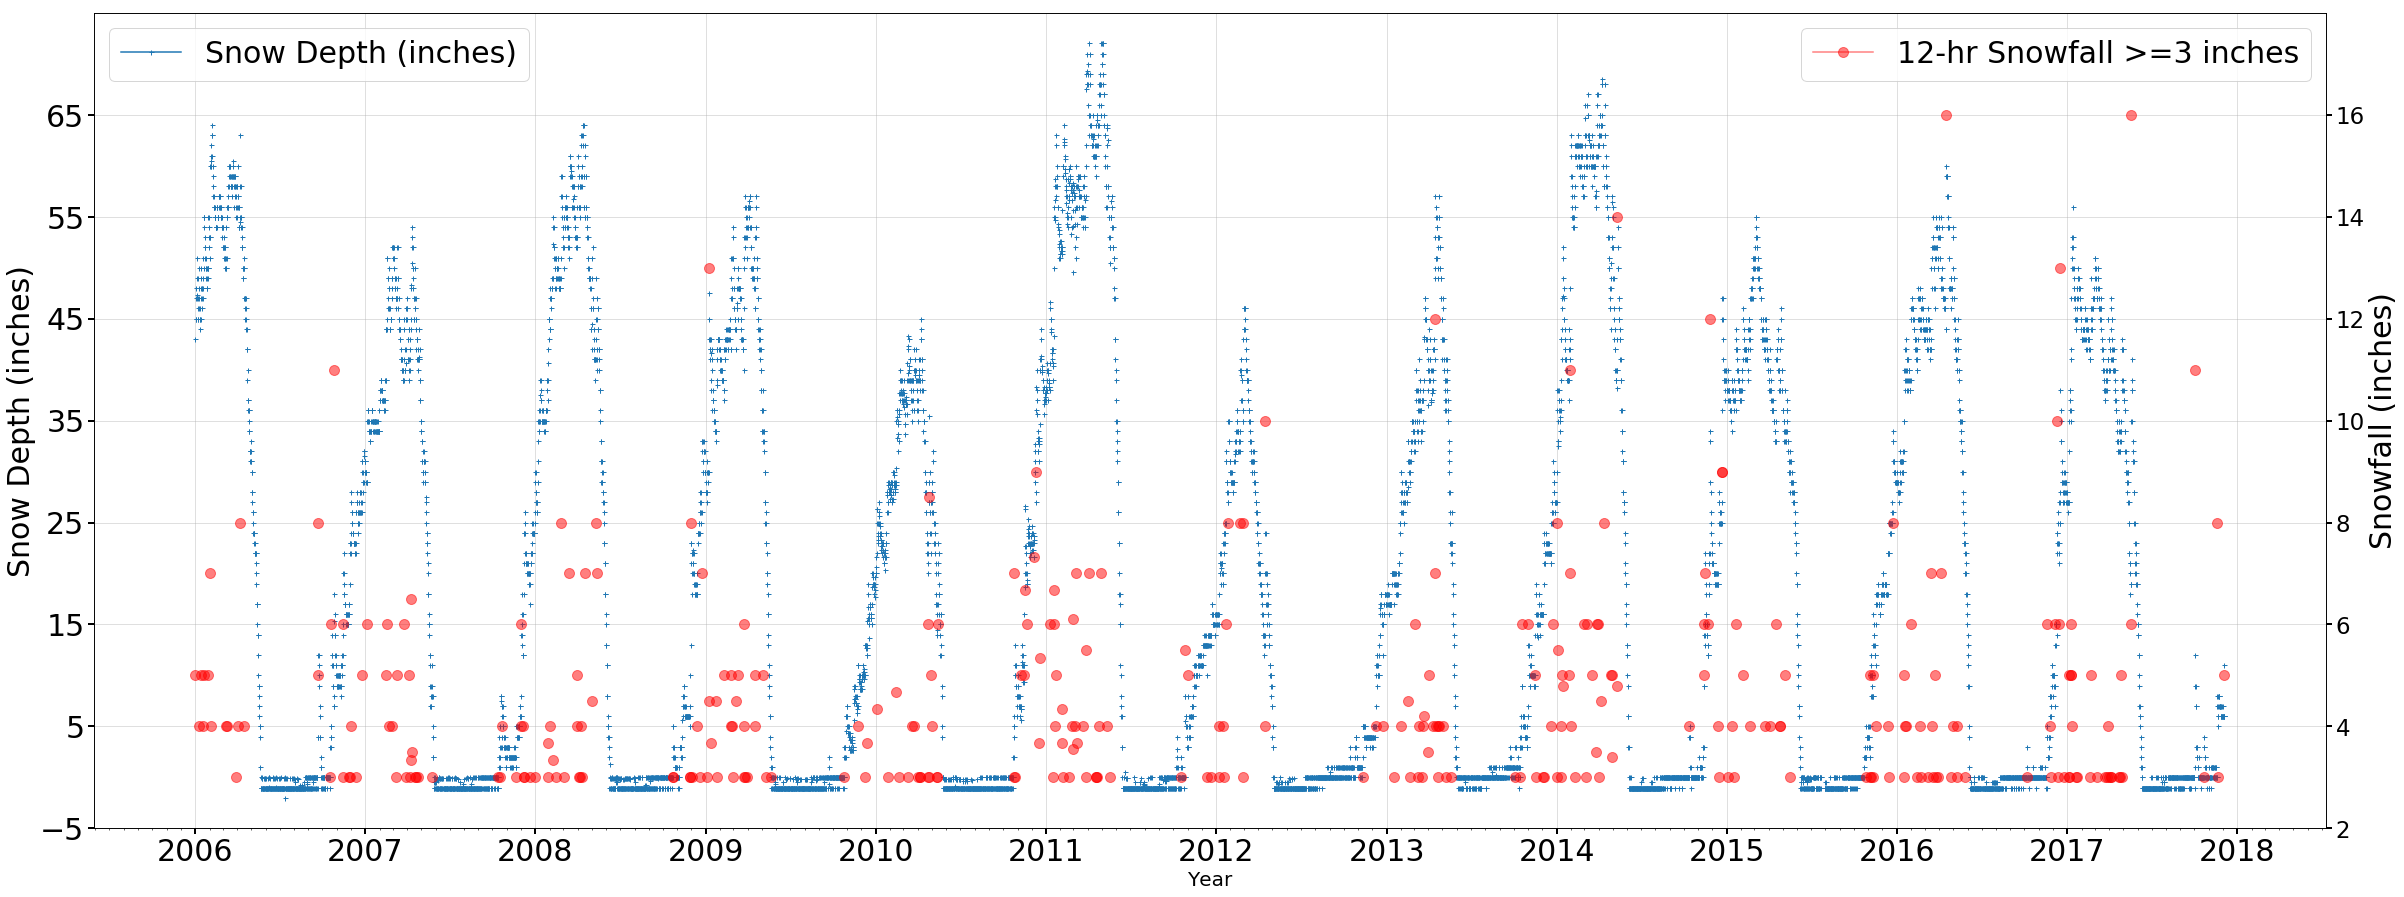

In [35]:
fig, ax1 = plt.subplots(figsize=(40,15))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['2006':'2017'], marker='+', markersize = 5, label = "Snow Depth (inches)")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['2006':'2017'], marker='.', markersize = 20, alpha = 0.5,  label = "12-hr Snowfall >=3 inches" , color = 'r')

ax2.set_yticks(np.arange(2,18,2))
ax1.set_yticks(np.arange(-5,75,10))
#ax2.set_yticks([2,4,6,7,8,9,10,11,12,13,14,15,16,17,18])
#ax1.set_yticks([-5,5, 15,25,35,45,55,65,75])

numsteps = 9
#ax2.set_yticks(np.linspace(ax2.yaxis.min(),ax2.yaxis.max(),numStep))
#ax1.set_yticks(np.linspace(ylim()[0],ylim()[1],numSteps))

ax1.set_ylim(-5,75)
ax2.set_ylim(2,18)

ax1.grid(True)


ax1.legend(loc='upper left', fontsize = 30)
ax2.legend(loc='upper right', fontsize = 30)

ax1.set_ylabel('Snow Depth (inches)', size = 30)
ax2.set_ylabel('Snowfall (inches)', size = 30)

ax1.set_xlabel('Year', size=20)
ax1.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=30)

ax2.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize=23)

ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_locator(mdates.YearLocator())

#ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('\n%m-%d-%Y')) 


print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())
fig.savefig(r'C:\Users\RAPP\Documents\Capstone\MS_CS_report\figs\snowdepth_snowfall.png', bbox_inches='tight')


It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

**Include a delta Pressure variable**

In [36]:
asos_snotel_df['LXV_12hr_delta_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+12)
print(asos_snotel_df['LXV_12hr_delta_Pressure_hp'].describe())

count    94709.000000
mean        -0.001372
std          4.485377
min        -21.400000
25%         -2.700000
50%         -0.200000
75%          2.300000
max         26.900000
Name: LXV_12hr_delta_Pressure_hp, dtype: float64


In [37]:
asos_snotel_df.to_csv('asos_snotel_clean_w_LXV.dat',sep = ',', float_format = '%.2f')